In [195]:
import arff
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [196]:
#Load Data
file_path = os.path.join('data', '1year.arff')

with open(file_path, 'r') as f:
    data = arff.load(f)

# Access the loaded data
instances = data['data']
attributes = data['attributes']
relation = data['relation']

In [197]:
# Convert ARFF data to DataFrame
df = pd.DataFrame(data['data'])
# Assign column names
column_names = [
    'net_profit_total_assets', 'total_liabilities_total_assets', 'working_capital_total_assets',
    'current_assets_short_term_liabilities', 'cash_short_term_securities_receivables_short_term_liabilities',
    'retained_earnings_total_assets', 'EBIT_total_assets', 'book_value_equity_total_liabilities',
    'sales_total_assets', 'equity_total_assets', 'gross_profit_extraordinary_items_financial_expenses_total_assets',
    'gross_profit_short_term_liabilities', 'gross_profit_depreciation_sales',
    'gross_profit_interest_total_assets', 'total_liabilities_365_gross_profit_depreciation',
    'gross_profit_depreciation_total_liabilities', 'total_assets_total_liabilities',
    'gross_profit_total_assets', 'gross_profit_sales', 'inventory_365_sales',
    'sales_n_sales_n_minus_1', 'profit_operating_activities_total_assets', 'net_profit_sales',
    'gross_profit_3_years_total_assets', 'equity_share_capital_total_assets',
    'net_profit_depreciation_total_liabilities', 'profit_operating_activities_financial_expenses',
    'working_capital_fixed_assets', 'logarithm_total_assets', 'total_liabilities_minus_cash_sales',
    'gross_profit_interest_sales', 'current_liabilities_365_cost_products_sold',
    'operating_expenses_short_term_liabilities', 'operating_expenses_total_liabilities',
    'profit_sales_total_assets', 'total_sales_total_assets', 'current_assets_inventories_long_term_liabilities',
    'constant_capital_total_assets', 'profit_sales_sales',
    'current_assets_inventory_receivables_short_term_liabilities',
    'total_liabilities_profit_operating_activities_depreciation_12_365',
    'profit_operating_activities_sales', 'rotation_receivables_inventory_turnover_days',
    'receivables_365_sales', 'net_profit_inventory',
    'current_assets_inventory_short_term_liabilities', 'inventory_365_cost_products_sold',
    'EBITDA_profit_operating_activities_depreciation_total_assets',
    'EBITDA_profit_operating_activities_depreciation_sales',
    'current_assets_total_liabilities', 'short_term_liabilities_total_assets',
    'short_term_liabilities_365_cost_products_sold', 'equity_fixed_assets',
    'constant_capital_fixed_assets', 'working_capital',
    'sales_cost_products_sold_sales', 'current_assets_inventory_short_term_liabilities_sales_gross_profit_depreciation',
    'total_costs_total_sales', 'long_term_liabilities_equity',
    'sales_inventory', 'sales_receivables',
    'short_term_liabilities_365_sales', 'sales_short_term_liabilities',
    'sales_fixed_assets','class'
]

df.columns = column_names

Group them if they are strongly correlated. Do not need all of them.

Group 1: -working_capital_total_assets, +total_liabilities_total_assets, -retained_earnings_total_assets, +current_liabilities_365_cost_products_sold, +short_term_liabilities_total_assets, +short_term_liabilities_365_cost_products_sold
Group 2: +equity_total_assets, +sales_total_assets, +equity_share_capital_total_assets, +total_sales_total_assets, +constant_capital_total_assets
Group 3: +gross_profit_extraordinary_items_financial_expenses_total_assets, +EBIT_total_assets, +gross_profit_interest_total_assets, +gross_profit_total_assets, +profit_operating_activities_total_assets, +gross_profit_3_years_total_assets, +profit_sales_total_assets, +EBITDA_profit_operating_activities_depreciation_total_assets
Group 4: +gross_profit_short_term_liabilities, +book_value_equity_total_liabilities, +gross_profit_depreciation_total_liabilities, +total_assets_total_liabilities, +net_profit_depreciation_total_liabilities
Group 5: +gross_profit_sales, +gross_profit_depreciation_sales, +inventory_365_sa

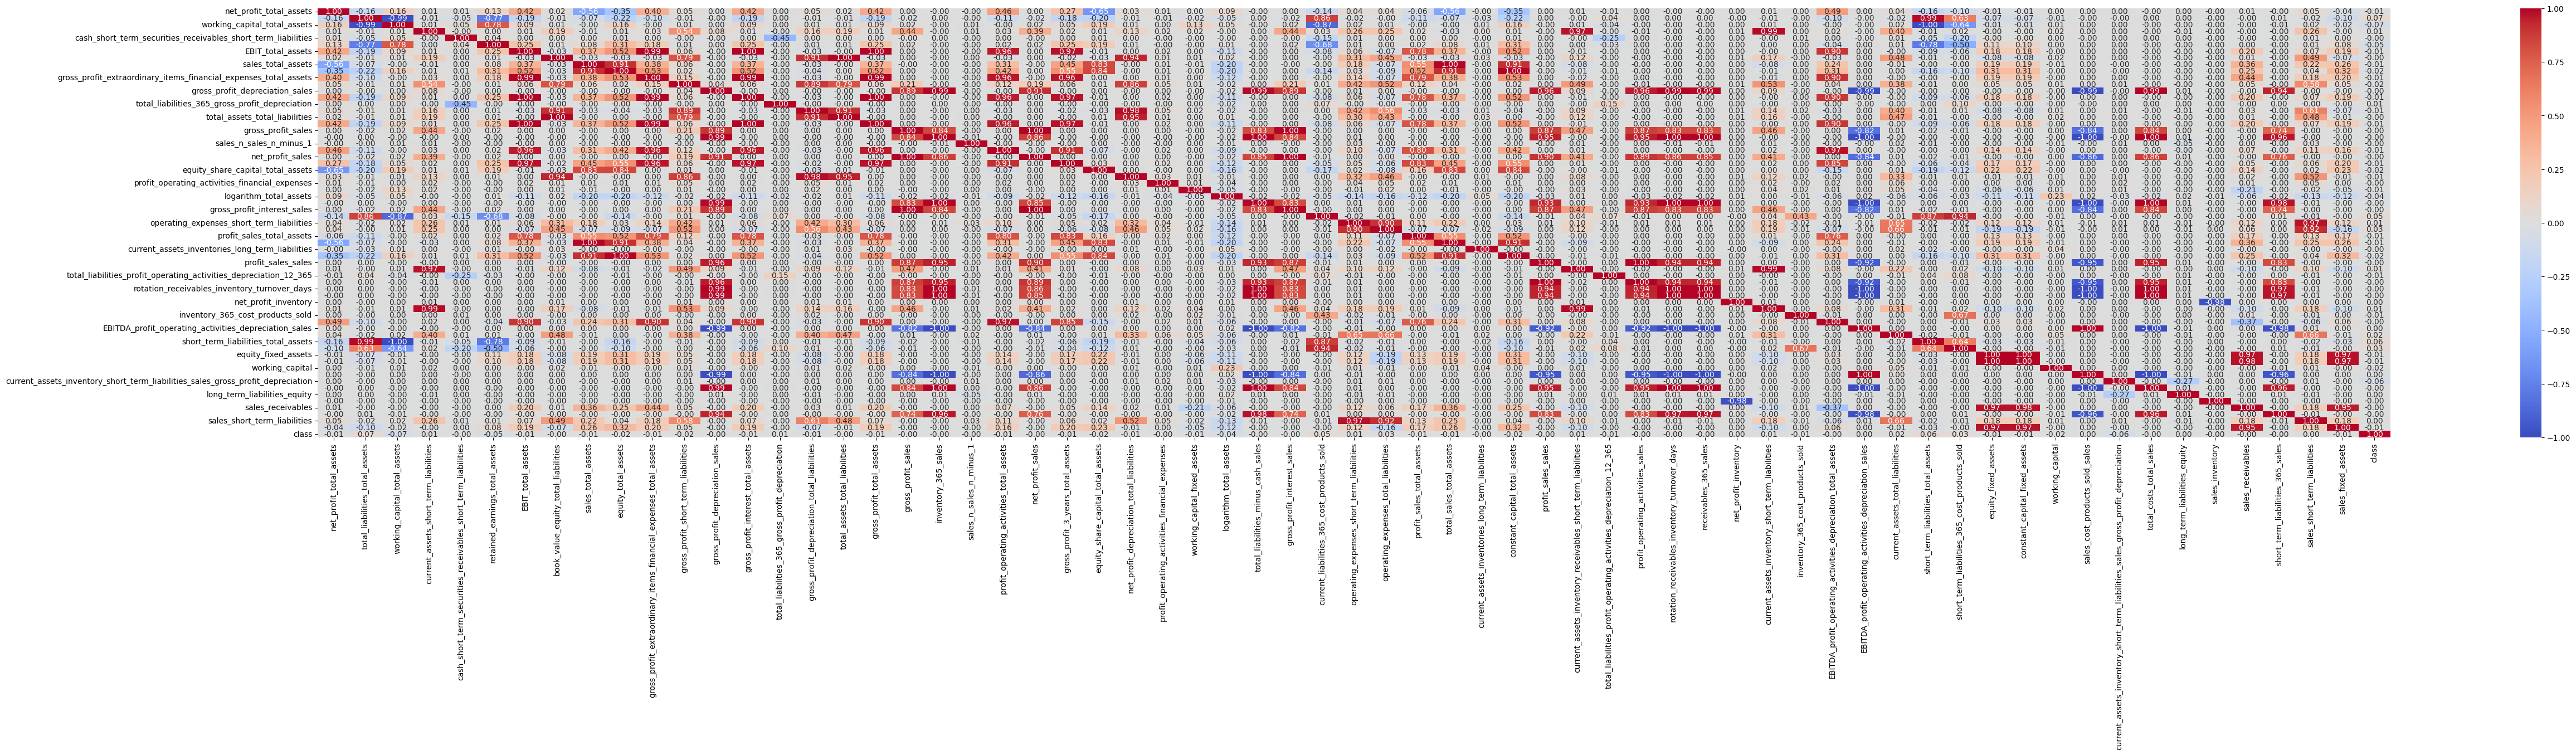

In [198]:

# Step 1: Calculate the correlation matrix
correlation_matrix = df.corr()

# Step 2: Set a threshold for strong correlation
threshold_strong = 0.7  # This is an test threshold

# Step 3: Find pairs and group them, indicating the sign of correlation
correlated_groups = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= threshold_strong:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            # Determine the sign of the correlation
            sign = '+' if correlation_matrix.iloc[i, j] > 0 else '-'

            # Check if the feature is already in a group
            found = False
            for group in correlated_groups:
                if colname_i in group or colname_j in group:
                    group.update({colname_i: sign, colname_j: sign})
                    found = True
                    break
            if not found:
                correlated_groups.append({colname_i: sign, colname_j: sign})

# Print out the groups of correlated features with group names and signs
for index, group in enumerate(correlated_groups, start=1):
    group_str = ", ".join(f"{sign}{name}" for name, sign in group.items())
    print(f"Group {index}: {group_str}")

# Optional: visualize the correlation matrix
plt.figure(figsize=(60, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


Remove the feature if they have strong correlation (90%+)


In [199]:

# Step 1: Calculate the correlation matrix
correlation_matrix = df.corr().abs()

# Step 2: Create a boolean mask for correlations above 90%
threshold = 0.9
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

# Step 3: Find index/column names for highly correlated features
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Step 4: Drop the marked features
df_reduced = df.drop(columns=to_drop)

# Print out the features that will be dropped
print(f"Features to be dropped due to high correlation (> 90%): {to_drop}")

# Print out the remaining features
print(f"Remaining features: {df_reduced.columns.tolist()}")


Features to be dropped due to high correlation (> 90%): ['working_capital_total_assets', 'equity_total_assets', 'gross_profit_extraordinary_items_financial_expenses_total_assets', 'gross_profit_interest_total_assets', 'gross_profit_depreciation_total_liabilities', 'total_assets_total_liabilities', 'gross_profit_total_assets', 'inventory_365_sales', 'profit_operating_activities_total_assets', 'net_profit_sales', 'gross_profit_3_years_total_assets', 'net_profit_depreciation_total_liabilities', 'total_liabilities_minus_cash_sales', 'gross_profit_interest_sales', 'operating_expenses_total_liabilities', 'total_sales_total_assets', 'constant_capital_total_assets', 'profit_sales_sales', 'current_assets_inventory_receivables_short_term_liabilities', 'profit_operating_activities_sales', 'rotation_receivables_inventory_turnover_days', 'receivables_365_sales', 'current_assets_inventory_short_term_liabilities', 'EBITDA_profit_operating_activities_depreciation_total_assets', 'EBITDA_profit_operatin

In [200]:
# Calculate the correlation matrix for the reduced DataFrame (without taking the absolute value)
correlation_matrix_reduced_non_abs = df_reduced.corr()

# Calculate the absolute correlation matrix for the threshold mask
correlation_matrix_reduced = correlation_matrix_reduced_non_abs.abs()

# Set the threshold for high correlation to 70%
threshold_high = 0.7

# Create a mask for correlations above the threshold in the reduced correlation matrix
high_corr_mask_reduced = correlation_matrix_reduced > threshold_high

# Initialize a dictionary to hold the groups of correlated features
feature_groups_reduced = {}
group_number = 1

# Iterate over the columns of the reduced correlation matrix
for i in range(len(high_corr_mask_reduced.columns)):
    # Check if the feature is already part of a group
    if not any(high_corr_mask_reduced.columns[i] in group for group in feature_groups_reduced.values()):
        # Find features that are highly correlated with the current feature
        correlated_features = list(high_corr_mask_reduced.index[high_corr_mask_reduced.iloc[:, i]])
        # Remove the feature itself from the list
        correlated_features = [feat for feat in correlated_features if feat != high_corr_mask_reduced.columns[i]]
        # Only consider features that have not been grouped yet
        correlated_features = [feat for feat in correlated_features if not any(feat in group for group in feature_groups_reduced.values())]
        if correlated_features:
            # Assign the group number to the current set of correlated features
            feature_groups_reduced[group_number] = correlated_features + [high_corr_mask_reduced.columns[i]]
            group_number += 1

# Print out the groups of correlated features with signs
print("Groups of correlated features after dropping features with >90% correlation and with signs relative to 'net_profit_total_assets':\n")
for group_num, group_features in feature_groups_reduced.items():
    signed_group_features = []
    for feature in group_features:
        # Determine the sign of the correlation with 'net_profit_total_assets'
        sign = '+' if correlation_matrix_reduced_non_abs.at[feature, 'net_profit_total_assets'] >= 0 else '-'
        signed_group_features.append(f"{sign}{feature}")
    print(f"Group {group_num}: {signed_group_features}")


Groups of correlated features after dropping features with >90% correlation and with signs relative to 'net_profit_total_assets':

Group 1: ['+retained_earnings_total_assets', '-current_liabilities_365_cost_products_sold', '-total_liabilities_total_assets']
Group 2: ['-profit_sales_total_assets', '+EBIT_total_assets']
Group 3: ['+gross_profit_short_term_liabilities', '+book_value_equity_total_liabilities']
Group 4: ['-equity_share_capital_total_assets', '-sales_total_assets']
Group 5: ['+gross_profit_sales', '+gross_profit_depreciation_sales']


In [201]:
feature_groups_reduced
# List of feature groups
feature_groups = feature_groups_reduced
# Check for NaN values in each feature
nan_features = {}
for group, features in feature_groups.items():
    nan_features[group] = [feature for feature in features if df[feature].isna().any()]

# Print out the features that contain NaN values
for group, features_with_nans in nan_features.items():
    if features_with_nans:
        print(f"{group} features with NaN values: {features_with_nans}")
    else:
        print(f"{group} has no features with NaN values.")

# Calculate and print the percentage of NaN values for each feature
for group, features in feature_groups.items():
    print(f"NaN Percentage in {group}:")
    for feature in features:
        nan_percentage = df[feature].isna().sum() / len(df) * 100
        print(f"{feature}: {nan_percentage:.2f}%")


1 features with NaN values: ['retained_earnings_total_assets', 'current_liabilities_365_cost_products_sold', 'total_liabilities_total_assets']
2 features with NaN values: ['profit_sales_total_assets', 'EBIT_total_assets']
3 features with NaN values: ['gross_profit_short_term_liabilities', 'book_value_equity_total_liabilities']
4 features with NaN values: ['equity_share_capital_total_assets', 'sales_total_assets']
5 has no features with NaN values.
NaN Percentage in 1:
retained_earnings_total_assets: 0.04%
current_liabilities_365_cost_products_sold: 0.54%
total_liabilities_total_assets: 0.04%
NaN Percentage in 2:
profit_sales_total_assets: 0.04%
EBIT_total_assets: 0.04%
NaN Percentage in 3:
gross_profit_short_term_liabilities: 0.43%
book_value_equity_total_liabilities: 0.36%
NaN Percentage in 4:
equity_share_capital_total_assets: 0.04%
sales_total_assets: 0.01%
NaN Percentage in 5:
gross_profit_sales: 0.00%
gross_profit_depreciation_sales: 0.00%


In [204]:
# Flatten the list of all features from the groups
all_features = [feature for group in feature_groups.values() for feature in group]

# Drop rows with NaN values in any of the specified features
df_cleaned = df.dropna(subset=all_features)

# Check the shape of the original and cleaned dataframes
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")
print(f"Number of rows removed: {round((1-df_cleaned.shape[0]/df.shape[0]),4)*100}%")

df_pca = pd.DataFrame(index=df_cleaned.index)

# Initialize PCA with only 1 component for each group
pca = PCA(n_components=1)

# For each group, apply PCA and create a new feature
for group_num, features in feature_groups_reduced.items():
    # Clean the feature names by removing '+' and '-' signs
    cleaned_features = [f.lstrip('+-') for f in features]
    
    # Make sure the DataFrame has the cleaned column names
    df_cleaned.columns = [col.lstrip('+-') for col in df_cleaned.columns]
    
    # Create a combined feature name based on group number
    combined_feature_name = f'combined_feature{group_num}'
    
    # Apply PCA to the cleaned features
    df_pca[combined_feature_name] = pca.fit_transform(df_cleaned[cleaned_features])

# Drop the original features if they are no longer needed
for features in feature_groups_reduced.values():
    cleaned_features = [f.lstrip('+-') for f in features]
    df_cleaned.drop(cleaned_features, axis=1, inplace=True)


df_pca['class'] = df_cleaned['class']


Original DataFrame shape: (7027, 65)
Cleaned DataFrame shape: (6957, 65)
Number of rows removed: 1.0%


/var/folders/95/sy8w04495wn2w8fdhbld3b200000gn/T/ipykernel_59881/1843521364.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(cleaned_features, axis=1, inplace=True)
/var/folders/95/sy8w04495wn2w8fdhbld3b200000gn/T/ipykernel_59881/1843521364.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(cleaned_features, axis=1, inplace=True)
/var/folders/95/sy8w04495wn2w8fdhbld3b200000gn/T/ipykernel_59881/1843521364.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [205]:
df_pca['class'] = df_pca['class'].astype(int)

# Group the data by the 'class' column
grouped = df_pca.groupby('class')
print(grouped)
# Calculate summary statistics for each group
stats_class_1 = grouped.get_group(0).describe()
stats_class_2 = grouped.get_group(1).describe()

# Calculate the difference in statistics between the two classes
stats_difference = stats_class_1 - stats_class_2

# Display the statistics for class 1
print("Statistics for class 1:")
print(stats_class_1)

# Display the statistics for class 2
print("Statistics for class 2:")
print(stats_class_2)

# Display the difference in statistics
print("Difference in statistics (class 1 - class 2):")
print(stats_difference)


Statistics for class 1:
       combined_feature1  combined_feature2  combined_feature3   
count        6687.000000        6687.000000        6687.000000  \
mean          -49.136499          -0.012890           0.007797   
std          2454.961170           0.327467          19.257739   
min          -237.245521         -21.293346          -4.028053   
25%          -189.448840          -0.079395          -2.274335   
50%          -162.116632           0.030991          -1.643337   
75%          -119.067625           0.099859          -0.357926   
max        129102.236773           1.637247        1486.776945   

       combined_feature4  combined_feature5   class  
count        6687.000000        6687.000000  6687.0  
mean           -0.074309           0.096228     0.0  
std             0.459495         166.102623     0.0  
min            -0.917991        -706.394056     0.0  
25%            -0.301514          -2.117171     0.0  
50%            -0.096825          -2.069033     0.0  
75%